# Testing data analysis scripts of a run

In case you only have the h5 files and not the .json

In [133]:
%matplotlib notebook
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from escape.parse import swissfel
import h5py
from jungfrau_utils import apply_gain_pede, apply_geometry
h5py.enable_ipython_completer()
import time
import sys

In [134]:
sys.path.insert(0, '../src/')
from data_analysis import *
from integrators import *

In [160]:
img_name = 'img001'
h5path = '/sf/bernina/data/p17743/raw/%s.JF07T32V01.h5' % img_name
h5file = h5py.File(h5path,'r')
jf7 = h5file['data/JF07T32V01/data']
with h5py.File('/sf/bernina/config/jungfrau/gainMaps/JF07T32V01/gains.h5','r') as f:
    gains = f['gains'].value
with h5py.File('/sf/bernina/data/p17743/res/waterJet_tests/JFpedestal/pedestal_20190125_1507.JF07T32V01.res.h5','r') as f:
    pede = f['gains'].value
with h5py.File('/sf/bernina/data/p17743/res/JF_pedestals/pedestal_20190115_1551.JF07T32V01.res.h5','r') as f:
    noise = f['gainsRMS'].value
    mask = f['pixel_mask'].value

In [136]:
n_shots=10
icorr = apply_gain_pede(jf7[0],G=gains, P=pede, pixel_mask=mask)
icorr_geom = apply_geometry(icorr,'JF07T32V01')
mask_geom = ~apply_geometry(~(mask>0),'JF07T32V01')
icorr_geom[mask_geom] = 0#np.nan
avg_img = icorr_geom


In [79]:
bi,bf,db = -2,35,.01
bins = np.arange(bi,bf,db)
hy,hx = np.histogram(avg_img,bins=bins)
hy_avg = hy
for i in range(1,n_shots):
    t1 = time.time()
    icorr = apply_gain_pede(jf7[i],G=gains, P=pede, pixel_mask=mask)
    icorr_geom = apply_geometry(icorr,'JF07T32V01')
    icorr_geom[mask_geom] = 0
    avg_img+= icorr_geom
    hy,hx = np.histogram(avg_img[~mask_geom],bins=bins)
    hy_avg += hy
    print('s.%i, %.1f Hz'%(i, 1.0/(time.time() - t1)))
avg_img/=n_shots

hx = hx[:-1]
hy = np.array(hy,dtype=float)/float(len(bins)*n_shots)
#hy_avg[np.int(-bi/db)-1] += mask_geom.sum()*n_shots

s.1, 0.8 Hz
s.2, 0.8 Hz
s.3, 0.8 Hz
s.4, 0.8 Hz
s.5, 0.8 Hz
s.6, 0.8 Hz
s.7, 0.8 Hz
s.8, 0.8 Hz
s.9, 0.8 Hz
s.10, 0.8 Hz
s.11, 0.8 Hz
s.12, 0.8 Hz
s.13, 0.8 Hz
s.14, 0.8 Hz
s.15, 0.8 Hz
s.16, 0.8 Hz
s.17, 0.8 Hz
s.18, 0.8 Hz
s.19, 0.8 Hz
s.20, 0.8 Hz
s.21, 0.8 Hz
s.22, 0.8 Hz
s.23, 0.8 Hz
s.24, 0.8 Hz
s.25, 0.8 Hz
s.26, 0.8 Hz
s.27, 0.8 Hz
s.28, 0.8 Hz
s.29, 0.8 Hz
s.30, 0.8 Hz
s.31, 0.8 Hz
s.32, 0.8 Hz
s.33, 0.8 Hz
s.34, 0.8 Hz
s.35, 0.8 Hz
s.36, 0.8 Hz
s.37, 0.8 Hz
s.38, 0.8 Hz
s.39, 0.8 Hz
s.40, 0.8 Hz
s.41, 0.8 Hz
s.42, 0.8 Hz
s.43, 0.8 Hz
s.44, 0.8 Hz
s.45, 0.8 Hz
s.46, 0.8 Hz
s.47, 0.8 Hz
s.48, 0.8 Hz
s.49, 0.8 Hz
s.50, 0.8 Hz
s.51, 0.8 Hz
s.52, 0.8 Hz
s.53, 0.8 Hz
s.54, 0.8 Hz
s.55, 0.8 Hz
s.56, 0.8 Hz
s.57, 0.8 Hz
s.58, 0.8 Hz
s.59, 0.8 Hz
s.60, 0.8 Hz
s.61, 0.8 Hz
s.62, 0.8 Hz
s.63, 0.8 Hz
s.64, 0.8 Hz
s.65, 0.8 Hz
s.66, 0.8 Hz
s.67, 0.8 Hz
s.68, 0.8 Hz
s.69, 0.8 Hz
s.70, 0.8 Hz
s.71, 0.8 Hz
s.72, 0.8 Hz
s.73, 0.8 Hz
s.74, 0.8 Hz
s.75, 0.8 Hz
s.76, 0.8 Hz
s.77, 0.8 Hz
s.78, 0.

<IPython.core.display.Javascript object>


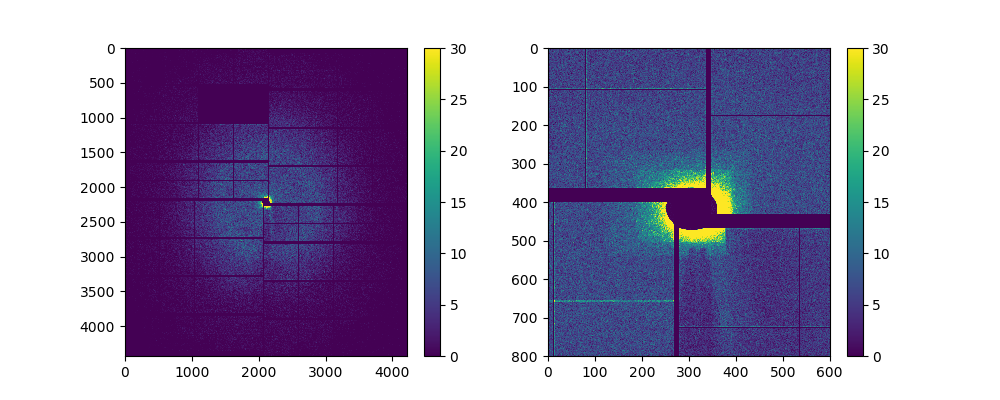

In [8]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.imshow(avg_img,aspect='auto',clim=[0,30])
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(avg_img[1800:2600,1800:2400],aspect='auto',clim=[0,30])
plt.colorbar()

plt.show()

<IPython.core.display.Javascript object>


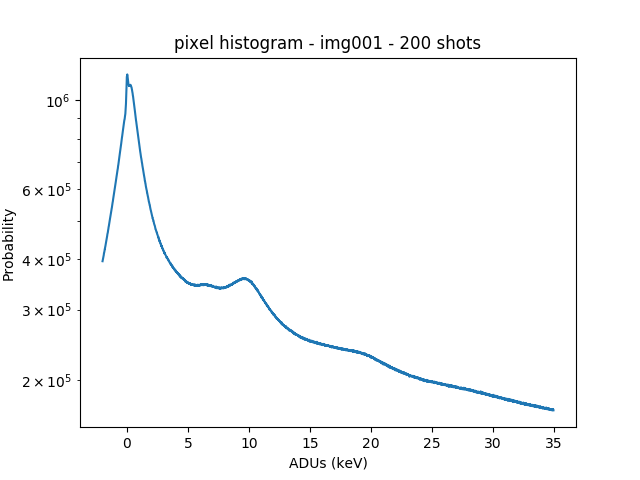

In [111]:
plt.figure()
plt.title('pixel histogram - %s - %d shots' % (img_name, n_shots))
plt.plot(hx,hy_avg)
plt.yscale('log',nonposy='clip')
plt.ylabel('Probability')
plt.xlabel('ADUs (keV)')
plt.savefig('%s_pixel_histogram.png' % img_name)
plt.show()

In [162]:
n_shots=5000
icorr = apply_gain_pede(jf7[0],G=gains, P=pede, pixel_mask=mask)
icorr_geom = apply_geometry(icorr,'JF07T32V01')
mask_geom = ~apply_geometry(~(mask>0),'JF07T32V01')
icorr_geom[mask_geom] = 0 #np.nan
avg_img = icorr_geom
mask_inv = np.logical_not(mask_geom) #inversed: 0 masked, 1 not masked  
iq_threshold = 4 #40
hits = 1

# initialise for angular integration                                        
rad_dist = radial_distances(icorr_geom)
ra = RadialAverager(rad_dist, mask_inv)
r  = ra.bin_centers
iq = ra(icorr_geom)
iqs = np.zeros((n_shots, iq.shape[0]))
iqs[0] = iq

for i in range(1,n_shots):
    t1 = time.time()
    icorr = apply_gain_pede(jf7[i],G=gains, P=pede, pixel_mask=mask)
    icorr_geom = apply_geometry(icorr,'JF07T32V01')
    icorr_geom[mask_geom] = 0
    iq = ra(icorr_geom)
    iqs[i] = iq
    if iq[5:80].mean() > iq_threshold:
        avg_img += icorr_geom
        hits += 1
        print('s.%i, %.1f Hz: %.2f photon/pix: HIT' % (i+1, 1.0/(time.time() - t1), np.mean(icorr_geom[mask_inv]/9.5)))
    else:
        print('s.%i, %.1f Hz: %.2f photon/pix' % (i+1, 1.0/(time.time() - t1), np.mean(icorr_geom[mask_inv]/9.5)))
avg_img /= hits
print('DONE! hitrate: %.1f%%' % (100*hits/n_shots))

s.2, 2.3 Hz: 0.14 photon/pix
s.3, 2.2 Hz: 0.47 photon/pix: HIT
s.4, 2.5 Hz: 0.15 photon/pix
s.5, 2.5 Hz: 0.14 photon/pix
s.6, 2.4 Hz: 0.38 photon/pix: HIT
s.7, 2.4 Hz: 0.09 photon/pix
s.8, 2.4 Hz: 0.16 photon/pix
s.9, 2.4 Hz: 0.11 photon/pix
s.10, 2.5 Hz: 0.13 photon/pix
s.11, 2.4 Hz: 0.44 photon/pix: HIT
s.12, 2.5 Hz: 0.12 photon/pix
s.13, 2.5 Hz: 0.09 photon/pix
s.14, 2.4 Hz: 0.12 photon/pix
s.15, 2.5 Hz: 0.14 photon/pix
s.16, 2.4 Hz: 0.42 photon/pix: HIT
s.17, 2.5 Hz: 0.14 photon/pix
s.18, 2.5 Hz: 0.14 photon/pix
s.19, 2.4 Hz: 0.45 photon/pix: HIT
s.20, 2.5 Hz: 0.16 photon/pix
s.21, 2.5 Hz: 0.13 photon/pix
s.22, 2.5 Hz: 0.10 photon/pix
s.23, 2.5 Hz: 0.14 photon/pix
s.24, 2.5 Hz: 0.12 photon/pix
s.25, 2.4 Hz: 0.44 photon/pix: HIT
s.26, 2.4 Hz: 0.52 photon/pix: HIT
s.27, 2.5 Hz: 0.12 photon/pix
s.28, 2.5 Hz: 0.10 photon/pix
s.29, 2.4 Hz: 0.33 photon/pix: HIT
s.30, 2.3 Hz: 0.30 photon/pix: HIT
s.31, 2.5 Hz: 0.14 photon/pix
s.32, 2.5 Hz: 0.12 photon/pix
s.33, 2.5 Hz: 0.14 photon/pix
s.3

s.261, 2.4 Hz: 0.50 photon/pix: HIT
s.262, 2.4 Hz: 0.13 photon/pix
s.263, 2.5 Hz: 0.12 photon/pix
s.264, 2.5 Hz: 0.12 photon/pix
s.265, 2.5 Hz: 0.15 photon/pix
s.266, 2.5 Hz: 0.13 photon/pix
s.267, 2.5 Hz: 0.12 photon/pix
s.268, 2.5 Hz: 0.13 photon/pix
s.269, 2.3 Hz: 0.44 photon/pix: HIT
s.270, 2.5 Hz: 0.13 photon/pix
s.271, 2.4 Hz: 0.41 photon/pix: HIT
s.272, 2.5 Hz: 0.14 photon/pix
s.273, 2.4 Hz: 0.16 photon/pix
s.274, 2.5 Hz: 0.15 photon/pix
s.275, 2.4 Hz: 0.52 photon/pix: HIT
s.276, 2.5 Hz: 0.16 photon/pix
s.277, 2.5 Hz: 0.13 photon/pix
s.278, 2.5 Hz: 0.15 photon/pix
s.279, 2.4 Hz: 0.36 photon/pix: HIT
s.280, 2.4 Hz: 0.46 photon/pix: HIT
s.281, 2.5 Hz: 0.12 photon/pix
s.282, 2.5 Hz: 0.12 photon/pix
s.283, 2.5 Hz: 0.28 photon/pix
s.284, 2.5 Hz: 0.14 photon/pix
s.285, 2.5 Hz: 0.12 photon/pix
s.286, 2.5 Hz: 0.24 photon/pix
s.287, 2.5 Hz: 0.09 photon/pix
s.288, 2.5 Hz: 0.07 photon/pix
s.289, 2.5 Hz: 0.11 photon/pix
s.290, 2.5 Hz: 0.12 photon/pix
s.291, 2.4 Hz: 0.11 photon/pix
s.292, 2.

s.516, 2.5 Hz: 0.12 photon/pix
s.517, 2.5 Hz: 0.12 photon/pix
s.518, 2.5 Hz: 0.14 photon/pix
s.519, 2.5 Hz: 0.15 photon/pix
s.520, 2.5 Hz: 0.27 photon/pix
s.521, 2.5 Hz: 0.15 photon/pix
s.522, 2.5 Hz: 0.12 photon/pix
s.523, 2.4 Hz: 0.41 photon/pix: HIT
s.524, 2.5 Hz: 0.12 photon/pix
s.525, 2.5 Hz: 0.15 photon/pix
s.526, 2.5 Hz: 0.13 photon/pix
s.527, 2.4 Hz: 0.38 photon/pix: HIT
s.528, 2.5 Hz: 0.15 photon/pix
s.529, 2.4 Hz: 0.48 photon/pix: HIT
s.530, 2.4 Hz: 0.36 photon/pix: HIT
s.531, 2.4 Hz: 0.14 photon/pix
s.532, 2.5 Hz: 0.12 photon/pix
s.533, 2.5 Hz: 0.11 photon/pix
s.534, 2.5 Hz: 0.13 photon/pix
s.535, 2.3 Hz: 0.43 photon/pix: HIT
s.536, 2.5 Hz: 0.12 photon/pix
s.537, 2.5 Hz: 0.12 photon/pix
s.538, 2.4 Hz: 0.46 photon/pix: HIT
s.539, 2.5 Hz: 0.16 photon/pix
s.540, 2.5 Hz: 0.14 photon/pix
s.541, 2.5 Hz: 0.12 photon/pix
s.542, 2.4 Hz: 0.54 photon/pix: HIT
s.543, 2.5 Hz: 0.13 photon/pix
s.544, 2.5 Hz: 0.14 photon/pix
s.545, 2.5 Hz: 0.14 photon/pix
s.546, 2.5 Hz: 0.15 photon/pix
s.54

s.772, 2.3 Hz: 0.15 photon/pix
s.773, 2.3 Hz: 0.16 photon/pix
s.774, 2.3 Hz: 0.15 photon/pix
s.775, 2.3 Hz: 0.14 photon/pix
s.776, 2.2 Hz: 0.37 photon/pix: HIT
s.777, 2.3 Hz: 0.12 photon/pix
s.778, 2.2 Hz: 0.33 photon/pix: HIT
s.779, 2.3 Hz: 0.15 photon/pix
s.780, 2.3 Hz: 0.15 photon/pix
s.781, 2.3 Hz: 0.13 photon/pix
s.782, 2.2 Hz: 0.38 photon/pix: HIT
s.783, 2.4 Hz: 0.13 photon/pix
s.784, 2.3 Hz: 0.36 photon/pix: HIT
s.785, 2.3 Hz: 0.14 photon/pix
s.786, 2.3 Hz: 0.34 photon/pix: HIT
s.787, 2.3 Hz: 0.15 photon/pix
s.788, 2.3 Hz: 0.21 photon/pix
s.789, 2.4 Hz: 0.14 photon/pix
s.790, 2.2 Hz: 0.50 photon/pix: HIT
s.791, 2.3 Hz: 0.16 photon/pix
s.792, 2.3 Hz: 0.13 photon/pix
s.793, 2.3 Hz: 0.14 photon/pix
s.794, 2.4 Hz: 0.10 photon/pix
s.795, 2.3 Hz: 0.14 photon/pix
s.796, 2.4 Hz: 0.15 photon/pix
s.797, 2.4 Hz: 0.13 photon/pix
s.798, 2.3 Hz: 0.15 photon/pix
s.799, 2.2 Hz: 0.41 photon/pix: HIT
s.800, 2.2 Hz: 0.15 photon/pix
s.801, 2.3 Hz: 0.11 photon/pix
s.802, 2.2 Hz: 0.36 photon/pix: HIT

s.1026, 2.3 Hz: 0.11 photon/pix
s.1027, 2.3 Hz: 0.16 photon/pix
s.1028, 2.3 Hz: 0.15 photon/pix
s.1029, 2.3 Hz: 0.15 photon/pix
s.1030, 2.3 Hz: 0.22 photon/pix
s.1031, 2.3 Hz: 0.27 photon/pix
s.1032, 2.2 Hz: 0.13 photon/pix
s.1033, 2.1 Hz: 0.34 photon/pix: HIT
s.1034, 2.3 Hz: 0.13 photon/pix
s.1035, 2.3 Hz: 0.15 photon/pix
s.1036, 2.3 Hz: 0.15 photon/pix
s.1037, 2.2 Hz: 0.13 photon/pix
s.1038, 2.3 Hz: 0.14 photon/pix
s.1039, 2.2 Hz: 0.12 photon/pix
s.1040, 2.3 Hz: 0.14 photon/pix
s.1041, 2.2 Hz: 0.13 photon/pix
s.1042, 2.2 Hz: 0.35 photon/pix: HIT
s.1043, 2.1 Hz: 0.54 photon/pix: HIT
s.1044, 2.3 Hz: 0.16 photon/pix
s.1045, 2.3 Hz: 0.17 photon/pix
s.1046, 2.4 Hz: 0.15 photon/pix
s.1047, 2.4 Hz: 0.17 photon/pix
s.1048, 2.3 Hz: 0.16 photon/pix
s.1049, 2.3 Hz: 0.13 photon/pix
s.1050, 2.3 Hz: 0.12 photon/pix
s.1051, 2.2 Hz: 0.16 photon/pix
s.1052, 2.4 Hz: 0.14 photon/pix
s.1053, 2.2 Hz: 0.32 photon/pix: HIT
s.1054, 2.4 Hz: 0.16 photon/pix
s.1055, 2.2 Hz: 0.15 photon/pix
s.1056, 2.2 Hz: 0.15

s.1274, 2.1 Hz: 0.45 photon/pix: HIT
s.1275, 2.2 Hz: 0.11 photon/pix
s.1276, 2.3 Hz: 0.13 photon/pix
s.1277, 2.4 Hz: 0.13 photon/pix
s.1278, 2.3 Hz: 0.12 photon/pix
s.1279, 2.3 Hz: 0.13 photon/pix
s.1280, 2.3 Hz: 0.11 photon/pix
s.1281, 2.4 Hz: 0.11 photon/pix
s.1282, 2.3 Hz: 0.09 photon/pix
s.1283, 2.3 Hz: 0.13 photon/pix
s.1284, 2.2 Hz: 0.39 photon/pix: HIT
s.1285, 2.2 Hz: 0.34 photon/pix: HIT
s.1286, 2.2 Hz: 0.38 photon/pix: HIT
s.1287, 2.3 Hz: 0.12 photon/pix
s.1288, 2.3 Hz: 0.12 photon/pix
s.1289, 2.2 Hz: 0.40 photon/pix: HIT
s.1290, 2.2 Hz: 0.52 photon/pix: HIT
s.1291, 2.3 Hz: 0.12 photon/pix
s.1292, 2.2 Hz: 0.52 photon/pix: HIT
s.1293, 2.2 Hz: 0.13 photon/pix
s.1294, 2.3 Hz: 0.14 photon/pix
s.1295, 2.2 Hz: 0.11 photon/pix
s.1296, 2.3 Hz: 0.21 photon/pix
s.1297, 2.3 Hz: 0.47 photon/pix: HIT
s.1298, 2.4 Hz: 0.23 photon/pix
s.1299, 2.3 Hz: 0.13 photon/pix
s.1300, 2.3 Hz: 0.35 photon/pix: HIT
s.1301, 2.4 Hz: 0.12 photon/pix
s.1302, 2.4 Hz: 0.14 photon/pix
s.1303, 2.3 Hz: 0.13 photon

s.1521, 2.3 Hz: 0.13 photon/pix
s.1522, 2.2 Hz: 0.38 photon/pix: HIT
s.1523, 2.4 Hz: 0.12 photon/pix
s.1524, 2.4 Hz: 0.20 photon/pix
s.1525, 2.3 Hz: 0.48 photon/pix: HIT
s.1526, 2.3 Hz: 0.41 photon/pix: HIT
s.1527, 2.3 Hz: 0.12 photon/pix
s.1528, 2.4 Hz: 0.13 photon/pix
s.1529, 2.3 Hz: 0.35 photon/pix: HIT
s.1530, 2.2 Hz: 0.44 photon/pix: HIT
s.1531, 2.3 Hz: 0.47 photon/pix: HIT
s.1532, 2.4 Hz: 0.43 photon/pix: HIT
s.1533, 2.4 Hz: 0.14 photon/pix
s.1534, 2.2 Hz: 0.46 photon/pix: HIT
s.1535, 2.4 Hz: 0.12 photon/pix
s.1536, 2.2 Hz: 0.55 photon/pix: HIT
s.1537, 2.4 Hz: 0.14 photon/pix
s.1538, 2.3 Hz: 0.15 photon/pix
s.1539, 2.4 Hz: 0.12 photon/pix
s.1540, 2.3 Hz: 0.14 photon/pix
s.1541, 2.2 Hz: 0.50 photon/pix: HIT
s.1542, 2.3 Hz: 0.15 photon/pix
s.1543, 2.2 Hz: 0.45 photon/pix: HIT
s.1544, 2.3 Hz: 0.12 photon/pix
s.1545, 2.3 Hz: 0.15 photon/pix
s.1546, 2.2 Hz: 0.46 photon/pix: HIT
s.1547, 2.2 Hz: 0.31 photon/pix: HIT
s.1548, 2.3 Hz: 0.14 photon/pix
s.1549, 2.3 Hz: 0.11 photon/pix
s.1550,

s.1767, 2.3 Hz: 0.14 photon/pix
s.1768, 2.3 Hz: 0.12 photon/pix
s.1769, 2.3 Hz: 0.15 photon/pix
s.1770, 2.3 Hz: 0.15 photon/pix
s.1771, 2.3 Hz: 0.14 photon/pix
s.1772, 2.3 Hz: 0.13 photon/pix
s.1773, 2.2 Hz: 0.36 photon/pix: HIT
s.1774, 2.3 Hz: 0.13 photon/pix
s.1775, 2.3 Hz: 0.14 photon/pix
s.1776, 2.2 Hz: 0.56 photon/pix: HIT
s.1777, 2.3 Hz: 0.16 photon/pix
s.1778, 2.3 Hz: 0.21 photon/pix
s.1779, 2.2 Hz: 0.39 photon/pix: HIT
s.1780, 2.3 Hz: 0.16 photon/pix
s.1781, 2.3 Hz: 0.14 photon/pix
s.1782, 2.3 Hz: 0.15 photon/pix
s.1783, 2.3 Hz: 0.14 photon/pix
s.1784, 2.3 Hz: 0.15 photon/pix
s.1785, 2.3 Hz: 0.17 photon/pix
s.1786, 2.3 Hz: 0.17 photon/pix
s.1787, 2.3 Hz: 0.16 photon/pix
s.1788, 2.3 Hz: 0.13 photon/pix
s.1789, 2.4 Hz: 0.13 photon/pix
s.1790, 2.4 Hz: 0.25 photon/pix
s.1791, 2.3 Hz: 0.21 photon/pix
s.1792, 2.3 Hz: 0.14 photon/pix
s.1793, 2.3 Hz: 0.12 photon/pix
s.1794, 2.3 Hz: 0.38 photon/pix: HIT
s.1795, 2.3 Hz: 0.09 photon/pix
s.1796, 2.3 Hz: 0.42 photon/pix: HIT
s.1797, 2.3 Hz:

s.2014, 2.3 Hz: 0.13 photon/pix
s.2015, 2.3 Hz: 0.12 photon/pix
s.2016, 2.4 Hz: 0.15 photon/pix
s.2017, 2.3 Hz: 0.44 photon/pix: HIT
s.2018, 2.3 Hz: 0.35 photon/pix: HIT
s.2019, 2.4 Hz: 0.15 photon/pix
s.2020, 2.4 Hz: 0.15 photon/pix
s.2021, 2.4 Hz: 0.13 photon/pix
s.2022, 2.4 Hz: 0.13 photon/pix
s.2023, 2.3 Hz: 0.12 photon/pix
s.2024, 2.4 Hz: 0.13 photon/pix
s.2025, 2.3 Hz: 0.11 photon/pix
s.2026, 2.3 Hz: 0.16 photon/pix
s.2027, 2.3 Hz: 0.09 photon/pix
s.2028, 2.3 Hz: 0.10 photon/pix
s.2029, 2.3 Hz: 0.12 photon/pix
s.2030, 2.3 Hz: 0.12 photon/pix
s.2031, 2.3 Hz: 0.14 photon/pix
s.2032, 2.3 Hz: 0.13 photon/pix
s.2033, 2.2 Hz: 0.42 photon/pix: HIT
s.2034, 2.3 Hz: 0.25 photon/pix
s.2035, 2.2 Hz: 0.32 photon/pix: HIT
s.2036, 2.4 Hz: 0.32 photon/pix: HIT
s.2037, 2.3 Hz: 0.43 photon/pix: HIT
s.2038, 2.3 Hz: 0.15 photon/pix
s.2039, 2.3 Hz: 0.11 photon/pix
s.2040, 2.3 Hz: 0.13 photon/pix
s.2041, 2.4 Hz: 0.16 photon/pix
s.2042, 2.3 Hz: 0.15 photon/pix
s.2043, 2.3 Hz: 0.13 photon/pix
s.2044, 2.

s.2261, 2.3 Hz: 0.15 photon/pix
s.2262, 2.3 Hz: 0.14 photon/pix
s.2263, 2.3 Hz: 0.17 photon/pix
s.2264, 2.3 Hz: 0.16 photon/pix
s.2265, 2.3 Hz: 0.16 photon/pix
s.2266, 2.4 Hz: 0.16 photon/pix
s.2267, 2.4 Hz: 0.20 photon/pix
s.2268, 2.4 Hz: 0.15 photon/pix
s.2269, 2.2 Hz: 0.31 photon/pix: HIT
s.2270, 2.3 Hz: 0.16 photon/pix
s.2271, 2.2 Hz: 0.50 photon/pix: HIT
s.2272, 2.4 Hz: 0.13 photon/pix
s.2273, 2.4 Hz: 0.14 photon/pix
s.2274, 2.3 Hz: 0.14 photon/pix
s.2275, 2.4 Hz: 0.14 photon/pix
s.2276, 2.4 Hz: 0.12 photon/pix
s.2277, 2.3 Hz: 0.14 photon/pix
s.2278, 2.3 Hz: 0.15 photon/pix
s.2279, 2.3 Hz: 0.17 photon/pix
s.2280, 2.4 Hz: 0.16 photon/pix
s.2281, 2.3 Hz: 0.16 photon/pix
s.2282, 2.2 Hz: 0.46 photon/pix: HIT
s.2283, 2.2 Hz: 0.45 photon/pix: HIT
s.2284, 2.2 Hz: 0.41 photon/pix: HIT
s.2285, 2.2 Hz: 0.56 photon/pix: HIT
s.2286, 2.3 Hz: 0.27 photon/pix
s.2287, 2.3 Hz: 0.15 photon/pix
s.2288, 2.2 Hz: 0.49 photon/pix: HIT
s.2289, 2.3 Hz: 0.10 photon/pix
s.2290, 2.3 Hz: 0.13 photon/pix
s.229

s.2508, 2.4 Hz: 0.14 photon/pix
s.2509, 2.3 Hz: 0.15 photon/pix
s.2510, 2.2 Hz: 0.40 photon/pix: HIT
s.2511, 2.3 Hz: 0.14 photon/pix
s.2512, 2.3 Hz: 0.09 photon/pix
s.2513, 2.3 Hz: 0.07 photon/pix
s.2514, 2.3 Hz: 0.12 photon/pix
s.2515, 2.3 Hz: 0.08 photon/pix
s.2516, 2.2 Hz: 0.32 photon/pix: HIT
s.2517, 2.3 Hz: 0.10 photon/pix
s.2518, 2.3 Hz: 0.10 photon/pix
s.2519, 2.2 Hz: 0.49 photon/pix: HIT
s.2520, 2.3 Hz: 0.13 photon/pix
s.2521, 2.3 Hz: 0.14 photon/pix
s.2522, 2.2 Hz: 0.48 photon/pix: HIT
s.2523, 2.2 Hz: 0.39 photon/pix: HIT
s.2524, 2.3 Hz: 0.11 photon/pix
s.2525, 2.2 Hz: 0.44 photon/pix: HIT
s.2526, 2.2 Hz: 0.47 photon/pix: HIT
s.2527, 2.2 Hz: 0.48 photon/pix: HIT
s.2528, 2.3 Hz: 0.15 photon/pix
s.2529, 2.4 Hz: 0.13 photon/pix
s.2530, 2.3 Hz: 0.12 photon/pix
s.2531, 2.3 Hz: 0.14 photon/pix
s.2532, 2.4 Hz: 0.28 photon/pix
s.2533, 2.3 Hz: 0.12 photon/pix
s.2534, 2.3 Hz: 0.08 photon/pix
s.2535, 2.3 Hz: 0.06 photon/pix
s.2536, 2.3 Hz: 0.29 photon/pix: HIT
s.2537, 2.3 Hz: 0.52 photon

s.2752, 2.3 Hz: 0.12 photon/pix
s.2753, 2.2 Hz: 0.36 photon/pix: HIT
s.2754, 2.3 Hz: 0.13 photon/pix
s.2755, 2.3 Hz: 0.11 photon/pix
s.2756, 2.3 Hz: 0.27 photon/pix
s.2757, 2.3 Hz: 0.12 photon/pix
s.2758, 2.3 Hz: 0.38 photon/pix: HIT
s.2759, 2.2 Hz: 0.44 photon/pix: HIT
s.2760, 2.3 Hz: 0.14 photon/pix
s.2761, 2.3 Hz: 0.13 photon/pix
s.2762, 2.3 Hz: 0.48 photon/pix: HIT
s.2763, 2.4 Hz: 0.14 photon/pix
s.2764, 2.4 Hz: 0.12 photon/pix
s.2765, 2.4 Hz: 0.14 photon/pix
s.2766, 2.3 Hz: 0.12 photon/pix
s.2767, 2.2 Hz: 0.36 photon/pix: HIT
s.2768, 2.3 Hz: 0.13 photon/pix
s.2769, 2.3 Hz: 0.14 photon/pix
s.2770, 2.3 Hz: 0.08 photon/pix
s.2771, 2.3 Hz: 0.12 photon/pix
s.2772, 2.3 Hz: 0.11 photon/pix
s.2773, 2.2 Hz: 0.48 photon/pix: HIT
s.2774, 2.3 Hz: 0.15 photon/pix
s.2775, 2.2 Hz: 0.45 photon/pix: HIT
s.2776, 2.2 Hz: 0.46 photon/pix: HIT
s.2777, 2.3 Hz: 0.42 photon/pix: HIT
s.2778, 2.3 Hz: 0.33 photon/pix: HIT
s.2779, 2.4 Hz: 0.13 photon/pix
s.2780, 2.4 Hz: 0.13 photon/pix
s.2781, 2.3 Hz: 0.14 p

s.2999, 2.3 Hz: 0.13 photon/pix
s.3000, 2.2 Hz: 0.15 photon/pix
s.3001, 2.3 Hz: 0.14 photon/pix
s.3002, 2.3 Hz: 0.13 photon/pix
s.3003, 2.2 Hz: 0.12 photon/pix
s.3004, 2.3 Hz: 0.14 photon/pix
s.3005, 2.3 Hz: 0.15 photon/pix
s.3006, 2.3 Hz: 0.12 photon/pix
s.3007, 2.3 Hz: 0.32 photon/pix: HIT
s.3008, 2.4 Hz: 0.13 photon/pix
s.3009, 2.3 Hz: 0.15 photon/pix
s.3010, 2.2 Hz: 0.34 photon/pix: HIT
s.3011, 2.3 Hz: 0.12 photon/pix
s.3012, 2.4 Hz: 0.13 photon/pix
s.3013, 2.3 Hz: 0.14 photon/pix
s.3014, 2.3 Hz: 0.15 photon/pix
s.3015, 2.3 Hz: 0.14 photon/pix
s.3016, 2.3 Hz: 0.14 photon/pix
s.3017, 2.4 Hz: 0.15 photon/pix
s.3018, 2.3 Hz: 0.14 photon/pix
s.3019, 2.3 Hz: 0.14 photon/pix
s.3020, 2.4 Hz: 0.12 photon/pix
s.3021, 2.3 Hz: 0.49 photon/pix: HIT
s.3022, 2.2 Hz: 0.48 photon/pix: HIT
s.3023, 2.2 Hz: 0.40 photon/pix: HIT
s.3024, 2.3 Hz: 0.15 photon/pix
s.3025, 2.3 Hz: 0.12 photon/pix
s.3026, 2.3 Hz: 0.15 photon/pix
s.3027, 2.3 Hz: 0.15 photon/pix
s.3028, 2.3 Hz: 0.14 photon/pix
s.3029, 2.2 Hz:

s.3247, 2.3 Hz: 0.25 photon/pix
s.3248, 2.4 Hz: 0.13 photon/pix
s.3249, 2.3 Hz: 0.13 photon/pix
s.3250, 2.3 Hz: 0.13 photon/pix
s.3251, 2.3 Hz: 0.13 photon/pix
s.3252, 2.3 Hz: 0.12 photon/pix
s.3253, 2.3 Hz: 0.11 photon/pix
s.3254, 2.3 Hz: 0.13 photon/pix
s.3255, 2.3 Hz: 0.09 photon/pix
s.3256, 2.3 Hz: 0.13 photon/pix
s.3257, 2.3 Hz: 0.13 photon/pix
s.3258, 2.3 Hz: 0.13 photon/pix
s.3259, 2.3 Hz: 0.10 photon/pix
s.3260, 2.3 Hz: 0.12 photon/pix
s.3261, 2.3 Hz: 0.14 photon/pix
s.3262, 2.3 Hz: 0.13 photon/pix
s.3263, 2.2 Hz: 0.41 photon/pix: HIT
s.3264, 2.2 Hz: 0.47 photon/pix: HIT
s.3265, 2.3 Hz: 0.14 photon/pix
s.3266, 2.2 Hz: 0.13 photon/pix
s.3267, 2.4 Hz: 0.15 photon/pix
s.3268, 2.4 Hz: 0.15 photon/pix
s.3269, 2.3 Hz: 0.49 photon/pix: HIT
s.3270, 2.3 Hz: 0.15 photon/pix
s.3271, 2.3 Hz: 0.13 photon/pix
s.3272, 2.4 Hz: 0.14 photon/pix
s.3273, 2.2 Hz: 0.43 photon/pix: HIT
s.3274, 2.3 Hz: 0.14 photon/pix
s.3275, 2.3 Hz: 0.11 photon/pix
s.3276, 2.3 Hz: 0.11 photon/pix
s.3277, 2.3 Hz: 0.15

s.3495, 2.3 Hz: 0.15 photon/pix
s.3496, 2.4 Hz: 0.12 photon/pix
s.3497, 2.3 Hz: 0.13 photon/pix
s.3498, 2.3 Hz: 0.13 photon/pix
s.3499, 2.4 Hz: 0.13 photon/pix
s.3500, 2.4 Hz: 0.15 photon/pix
s.3501, 2.3 Hz: 0.15 photon/pix
s.3502, 2.4 Hz: 0.13 photon/pix
s.3503, 2.3 Hz: 0.14 photon/pix
s.3504, 2.3 Hz: 0.14 photon/pix
s.3505, 2.4 Hz: 0.12 photon/pix
s.3506, 2.2 Hz: 0.48 photon/pix: HIT
s.3507, 2.3 Hz: 0.13 photon/pix
s.3508, 2.2 Hz: 0.45 photon/pix: HIT
s.3509, 2.2 Hz: 0.41 photon/pix: HIT
s.3510, 2.3 Hz: 0.11 photon/pix
s.3511, 2.3 Hz: 0.15 photon/pix
s.3512, 2.3 Hz: 0.13 photon/pix
s.3513, 2.3 Hz: 0.16 photon/pix
s.3514, 2.3 Hz: 0.14 photon/pix
s.3515, 2.3 Hz: 0.15 photon/pix
s.3516, 2.2 Hz: 0.50 photon/pix: HIT
s.3517, 2.3 Hz: 0.15 photon/pix
s.3518, 2.2 Hz: 0.43 photon/pix: HIT
s.3519, 2.3 Hz: 0.42 photon/pix: HIT
s.3520, 2.2 Hz: 0.33 photon/pix: HIT
s.3521, 2.3 Hz: 0.14 photon/pix
s.3522, 2.4 Hz: 0.14 photon/pix
s.3523, 2.4 Hz: 0.14 photon/pix
s.3524, 2.4 Hz: 0.15 photon/pix
s.352

s.3742, 2.3 Hz: 0.15 photon/pix
s.3743, 2.2 Hz: 0.28 photon/pix: HIT
s.3744, 2.2 Hz: 0.33 photon/pix: HIT
s.3745, 2.2 Hz: 0.28 photon/pix: HIT
s.3746, 2.3 Hz: 0.12 photon/pix
s.3747, 2.4 Hz: 0.12 photon/pix
s.3748, 2.3 Hz: 0.13 photon/pix
s.3749, 2.2 Hz: 0.43 photon/pix: HIT
s.3750, 2.4 Hz: 0.13 photon/pix
s.3751, 2.3 Hz: 0.15 photon/pix
s.3752, 2.3 Hz: 0.15 photon/pix
s.3753, 2.3 Hz: 0.13 photon/pix
s.3754, 2.3 Hz: 0.33 photon/pix: HIT
s.3755, 2.4 Hz: 0.28 photon/pix
s.3756, 2.4 Hz: 0.12 photon/pix
s.3757, 2.3 Hz: 0.14 photon/pix
s.3758, 2.3 Hz: 0.13 photon/pix
s.3759, 2.2 Hz: 0.36 photon/pix: HIT
s.3760, 2.3 Hz: 0.12 photon/pix
s.3761, 2.3 Hz: 0.11 photon/pix
s.3762, 2.3 Hz: 0.11 photon/pix
s.3763, 2.3 Hz: 0.12 photon/pix
s.3764, 2.3 Hz: 0.14 photon/pix
s.3765, 2.3 Hz: 0.13 photon/pix
s.3766, 2.3 Hz: 0.23 photon/pix
s.3767, 2.3 Hz: 0.12 photon/pix
s.3768, 2.2 Hz: 0.31 photon/pix: HIT
s.3769, 2.3 Hz: 0.12 photon/pix
s.3770, 2.2 Hz: 0.11 photon/pix
s.3771, 2.3 Hz: 0.33 photon/pix: HIT


s.3990, 2.4 Hz: 0.11 photon/pix
s.3991, 2.3 Hz: 0.13 photon/pix
s.3992, 2.3 Hz: 0.13 photon/pix
s.3993, 2.3 Hz: 0.11 photon/pix
s.3994, 2.3 Hz: 0.12 photon/pix
s.3995, 2.3 Hz: 0.11 photon/pix
s.3996, 2.2 Hz: 0.34 photon/pix: HIT
s.3997, 2.3 Hz: 0.11 photon/pix
s.3998, 2.2 Hz: 0.44 photon/pix: HIT
s.3999, 2.2 Hz: 0.43 photon/pix: HIT
s.4000, 2.2 Hz: 0.31 photon/pix: HIT
s.4001, 2.3 Hz: 0.13 photon/pix
s.4002, 2.3 Hz: 0.14 photon/pix
s.4003, 2.3 Hz: 0.14 photon/pix
s.4004, 2.3 Hz: 0.11 photon/pix
s.4005, 2.3 Hz: 0.26 photon/pix
s.4006, 2.3 Hz: 0.09 photon/pix
s.4007, 2.3 Hz: 0.13 photon/pix
s.4008, 2.3 Hz: 0.10 photon/pix
s.4009, 2.3 Hz: 0.12 photon/pix
s.4010, 2.3 Hz: 0.09 photon/pix
s.4011, 2.3 Hz: 0.09 photon/pix
s.4012, 2.4 Hz: 0.12 photon/pix
s.4013, 2.3 Hz: 0.13 photon/pix
s.4014, 2.4 Hz: 0.14 photon/pix
s.4015, 2.2 Hz: 0.41 photon/pix: HIT
s.4016, 2.3 Hz: 0.26 photon/pix
s.4017, 2.3 Hz: 0.13 photon/pix
s.4018, 2.3 Hz: 0.12 photon/pix
s.4019, 2.4 Hz: 0.15 photon/pix
s.4020, 2.3 Hz:

s.4238, 2.3 Hz: 0.15 photon/pix
s.4239, 2.3 Hz: 0.14 photon/pix
s.4240, 2.3 Hz: 0.51 photon/pix: HIT
s.4241, 2.3 Hz: 0.14 photon/pix
s.4242, 2.3 Hz: 0.14 photon/pix
s.4243, 2.4 Hz: 0.14 photon/pix
s.4244, 2.3 Hz: 0.11 photon/pix
s.4245, 2.2 Hz: 0.45 photon/pix: HIT
s.4246, 2.3 Hz: 0.12 photon/pix
s.4247, 2.4 Hz: 0.19 photon/pix
s.4248, 2.3 Hz: 0.13 photon/pix
s.4249, 2.2 Hz: 0.40 photon/pix: HIT
s.4250, 2.2 Hz: 0.33 photon/pix: HIT
s.4251, 2.3 Hz: 0.14 photon/pix
s.4252, 2.3 Hz: 0.15 photon/pix
s.4253, 2.2 Hz: 0.32 photon/pix: HIT
s.4254, 2.3 Hz: 0.16 photon/pix
s.4255, 2.2 Hz: 0.16 photon/pix
s.4256, 2.2 Hz: 0.50 photon/pix: HIT
s.4257, 2.2 Hz: 0.36 photon/pix: HIT
s.4258, 2.2 Hz: 0.40 photon/pix: HIT
s.4259, 2.2 Hz: 0.15 photon/pix
s.4260, 2.2 Hz: 0.43 photon/pix: HIT
s.4261, 2.3 Hz: 0.13 photon/pix
s.4262, 2.3 Hz: 0.14 photon/pix
s.4263, 2.4 Hz: 0.13 photon/pix
s.4264, 2.4 Hz: 0.15 photon/pix
s.4265, 2.3 Hz: 0.14 photon/pix
s.4266, 2.3 Hz: 0.15 photon/pix
s.4267, 2.3 Hz: 0.50 photon

s.4486, 2.3 Hz: 0.14 photon/pix
s.4487, 2.3 Hz: 0.12 photon/pix
s.4488, 2.4 Hz: 0.15 photon/pix
s.4489, 2.3 Hz: 0.43 photon/pix: HIT
s.4490, 2.3 Hz: 0.15 photon/pix
s.4491, 2.3 Hz: 0.14 photon/pix
s.4492, 2.4 Hz: 0.14 photon/pix
s.4493, 2.3 Hz: 0.49 photon/pix: HIT
s.4494, 2.3 Hz: 0.27 photon/pix: HIT
s.4495, 2.4 Hz: 0.15 photon/pix
s.4496, 2.3 Hz: 0.14 photon/pix
s.4497, 2.3 Hz: 0.14 photon/pix
s.4498, 2.3 Hz: 0.12 photon/pix
s.4499, 2.3 Hz: 0.44 photon/pix: HIT
s.4500, 2.3 Hz: 0.13 photon/pix
s.4501, 2.4 Hz: 0.14 photon/pix
s.4502, 2.2 Hz: 0.29 photon/pix: HIT
s.4503, 2.3 Hz: 0.14 photon/pix
s.4504, 2.3 Hz: 0.12 photon/pix
s.4505, 2.3 Hz: 0.13 photon/pix
s.4506, 2.3 Hz: 0.13 photon/pix
s.4507, 2.3 Hz: 0.11 photon/pix
s.4508, 2.3 Hz: 0.13 photon/pix
s.4509, 2.3 Hz: 0.11 photon/pix
s.4510, 2.2 Hz: 0.34 photon/pix: HIT
s.4511, 2.3 Hz: 0.15 photon/pix
s.4512, 2.3 Hz: 0.15 photon/pix
s.4513, 2.2 Hz: 0.39 photon/pix: HIT
s.4514, 2.3 Hz: 0.11 photon/pix
s.4515, 2.3 Hz: 0.12 photon/pix
s.451

s.4735, 2.3 Hz: 0.13 photon/pix
s.4736, 2.3 Hz: 0.14 photon/pix
s.4737, 2.2 Hz: 0.43 photon/pix: HIT
s.4738, 2.3 Hz: 0.15 photon/pix
s.4739, 2.3 Hz: 0.14 photon/pix
s.4740, 2.3 Hz: 0.17 photon/pix
s.4741, 2.2 Hz: 0.15 photon/pix
s.4742, 2.2 Hz: 0.28 photon/pix: HIT
s.4743, 2.3 Hz: 0.14 photon/pix
s.4744, 2.3 Hz: 0.14 photon/pix
s.4745, 2.2 Hz: 0.14 photon/pix
s.4746, 2.3 Hz: 0.13 photon/pix
s.4747, 2.3 Hz: 0.24 photon/pix
s.4748, 2.3 Hz: 0.14 photon/pix
s.4749, 2.3 Hz: 0.13 photon/pix
s.4750, 2.3 Hz: 0.43 photon/pix: HIT
s.4751, 2.3 Hz: 0.14 photon/pix
s.4752, 2.3 Hz: 0.14 photon/pix
s.4753, 2.3 Hz: 0.13 photon/pix
s.4754, 2.4 Hz: 0.13 photon/pix
s.4755, 2.3 Hz: 0.13 photon/pix
s.4756, 2.3 Hz: 0.13 photon/pix
s.4757, 2.3 Hz: 0.09 photon/pix
s.4758, 2.4 Hz: 0.10 photon/pix
s.4759, 2.2 Hz: 0.40 photon/pix: HIT
s.4760, 2.4 Hz: 0.10 photon/pix
s.4761, 2.3 Hz: 0.13 photon/pix
s.4762, 2.3 Hz: 0.13 photon/pix
s.4763, 2.3 Hz: 0.12 photon/pix
s.4764, 2.3 Hz: 0.15 photon/pix
s.4765, 2.3 Hz: 0.14

s.4982, 2.4 Hz: 0.15 photon/pix
s.4983, 2.3 Hz: 0.15 photon/pix
s.4984, 2.3 Hz: 0.15 photon/pix
s.4985, 2.2 Hz: 0.28 photon/pix: HIT
s.4986, 2.3 Hz: 0.13 photon/pix
s.4987, 2.2 Hz: 0.38 photon/pix: HIT
s.4988, 2.3 Hz: 0.16 photon/pix
s.4989, 2.3 Hz: 0.50 photon/pix: HIT
s.4990, 2.3 Hz: 0.15 photon/pix
s.4991, 2.3 Hz: 0.14 photon/pix
s.4992, 2.3 Hz: 0.12 photon/pix
s.4993, 2.2 Hz: 0.37 photon/pix: HIT
s.4994, 2.2 Hz: 0.44 photon/pix: HIT
s.4995, 2.3 Hz: 0.16 photon/pix
s.4996, 2.3 Hz: 0.14 photon/pix
s.4997, 2.3 Hz: 0.15 photon/pix
s.4998, 2.1 Hz: 0.37 photon/pix: HIT
s.4999, 2.3 Hz: 0.15 photon/pix
s.5000, 2.3 Hz: 0.13 photon/pix
DONE! hitrate: 24.0%


<IPython.core.display.Javascript object>


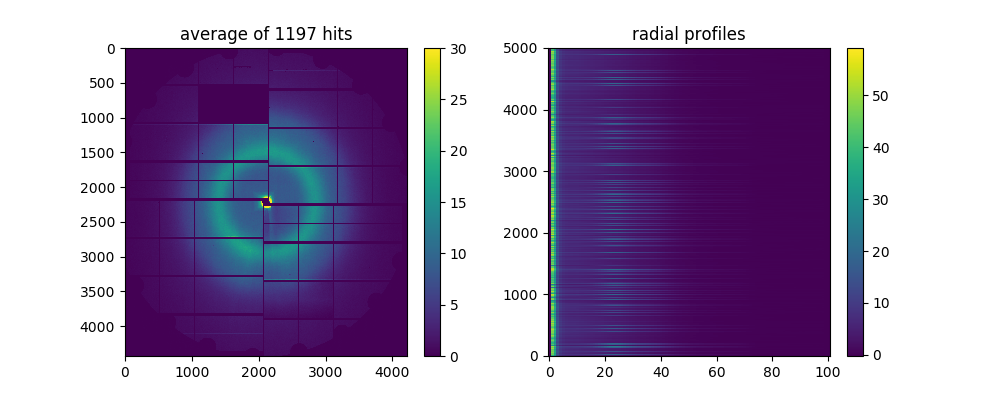

In [164]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('average of %d hits' % (hits - 1))
plt.imshow(avg_img,aspect='auto',clim=[0,30]) #[0,300]
plt.colorbar()

plt.subplot(1,2,2)
plt.title('radial profiles')
plt.imshow(iqs,origin='lower',aspect='auto')
plt.colorbar()

plt.savefig('%s_2d_hits+radial_profiles.png' % img_name)
plt.show()

In [165]:
iq_metric = iqs[:,5:80].mean(axis=1)
bi,bf,db = iq_metric.min(),iq_metric.max(),.5
bins = np.arange(bi-db,bf+db,db)
hy,hx = np.histogram(iq_metric,bins=bins)
bin_centers = np.array([(bins[j]+bins[j+1])/2. for j in range(len(bins)-1)])

<IPython.core.display.Javascript object>


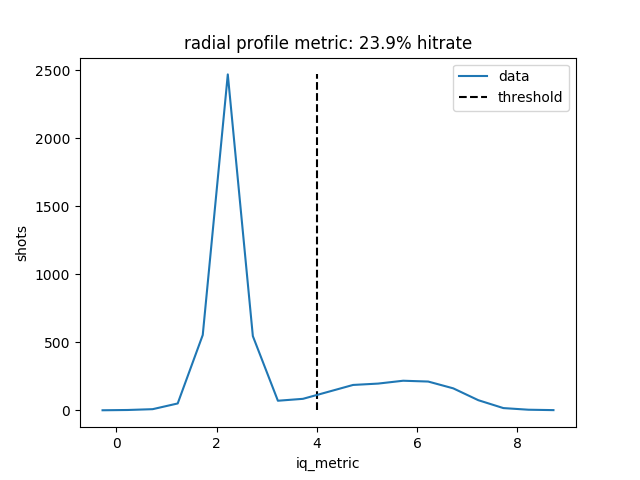

In [166]:
iq_threshold = 4 #40
plt.figure()
plt.title('radial profile metric: %.1f%% hitrate' % (100*(iq_metric > iq_threshold).sum()/n_shots))
plt.plot(bin_centers, hy, label='data')
plt.ylabel('shots')
plt.xlabel('iq_metric')
plt.vlines(iq_threshold,0,hy.max(),color='k',linestyles='dashed',label='threshold')
plt.legend()
plt.savefig('%s_radial_profile_hist.png' % img_name)
plt.show()

In [167]:
q = q_scale(r, detector_distance=0.12)
iq_avg = iqs[iq_metric > iq_threshold].mean(axis=0)

<IPython.core.display.Javascript object>


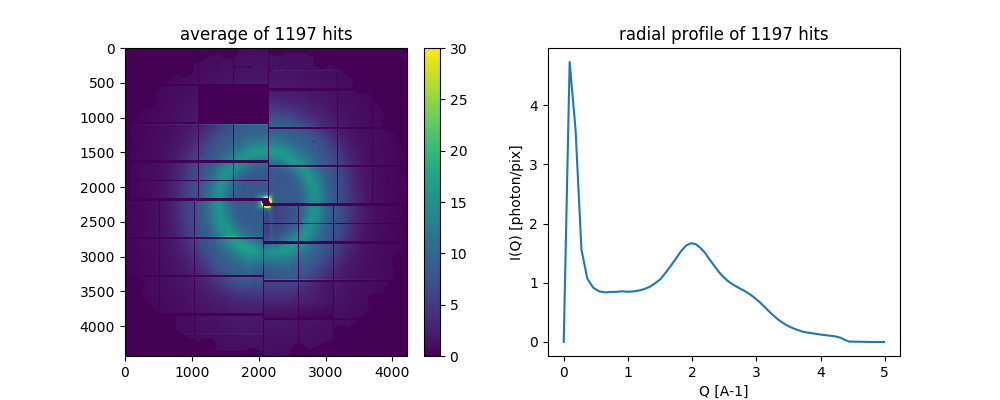

In [168]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('average of %d hits' % (hits - 1))
plt.imshow(avg_img,aspect='auto',clim=[0,30]) #[0,30]
plt.colorbar()

plt.subplot(1,2,2)
plt.title('radial profile of %d hits' % (iq_metric > iq_threshold).sum())
plt.plot(q, iq_avg/9.5)
plt.ylabel('I(Q) [photon/pix]')
plt.xlabel('Q [A-1]')

plt.savefig('%s_2d_hits+radial_profile_avg.png' % img_name)
plt.show()

In [169]:
save_data = np.array([avg_img*hits,hits,r,iqs])
save_path = '/sf/bernina/data/p17743/res/work/hdf5/%s_hits_only.h5'%img_name
save_h5(save_path,save_data)
print('saved data to: %s' % save_path)

saved data to: /sf/bernina/data/p17743/res/work/hdf5/img001_hits_only.h5
